In [2]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

from __future__ import division
from __future__ import print_function
from __future__ import absolute_import
from __future__ import unicode_literals  

import numpy as np
import pandas as pd
from matplotlib import colors
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr, norm, expon, gamma, skewnorm
import os.path
from sklearn.cluster import AgglomerativeClustering, SpectralBiclustering, SpectralCoclustering
from mpl_toolkits.mplot3d import Axes3D

import IPython

from configMaker import get_model_name

#dataset_type = 'cifar10'
dataset_type = 'mnist_small'
model_type = 'all_cnn_c_hidden'
#out = '../output-week4'
out = '../output-week3'
#nametag = 'find-distribs-deeper'
nametag = 'find_distribs'

if dataset_type == 'mnist_small':
    seeds = range(300)
    num_steps = 300000
    num_train_points = 5500
    num_units = 2
elif dataset_type == 'mnist':
    seeds = range(8)
    num_steps = 1000000
    num_train_points = 55000
    num_units = 3
elif dataset_type == 'cifar10_small':
    seeds = range(1)
    num_steps = 300000
    num_train_points = 4900
    num_units = 2
elif dataset_type == 'cifar10':
    seeds = range(13)
    num_steps = 1000000
    num_train_points = 49000
    num_units = 3
num_test_points = 10000
num_seeds = len(seeds)

allowed_fits = [None, 'normal']

test_idx=6558

fontsize=16
sns.set(color_codes=True)
sns.set_style('white')

def ceil_divide(numer,denom):
    return (numer-1)//denom+1

In [3]:
losses_over_time = [None] * num_seeds # every 1k steps
losses_fine_over_time = [None] * num_seeds # first 100 steps
indiv_train_losses = [None] * num_seeds # indiv train losses after training
indiv_test_losses = [None] * num_seeds # indiv test losses after training
indiv_pred_infls = [None] * num_seeds # indiv pred infls after trianing

for i, seed in enumerate(seeds):
    model_name = get_model_name(nametag=nametag, dataset_type=dataset_type, model_type=model_type, seed=seed, num_units=num_units, num_steps=num_steps)
    lossespathname = '../{}/{}_test_losses_over_time.npz'.format(out, model_name)
    traintestpredpathname = '../{}/{}_train_test_losses_pred_infl.npz'.format(out,model_name)
    #traintestpredpathname = '../{}/{}_train_test_losses_pred_infl_on_8.npz'.format(out,model_name)

    f1 = np.load(lossespathname)
    losses_over_time[i] = f1['losses']
    losses_fine_over_time[i] = f1['losses_fine']
    f2 = np.load(traintestpredpathname)
    indiv_train_losses[i] = f2['train_losses']
    indiv_test_losses[i] = f2['test_losses']
    indiv_pred_infls[i] = f2['pred_infl']
    
losses_over_time = np.array(losses_over_time)
losses_fine_over_time = np.array(losses_fine_over_time)
indiv_train_losses = np.array(indiv_train_losses)
indiv_test_losses = np.array(indiv_test_losses)
indiv_pred_infls = np.array(indiv_pred_infls)

In [4]:
train_means = [None] * num_train_points
train_stddevs = [None] * num_train_points
test_means = [None] * num_test_points
test_stddevs = [None] * num_test_points
infl_means = [None] * num_train_points
infl_stddevs = [None] * num_train_points

for i in range(num_train_points):
    train_means[i], train_stddevs[i] = norm.fit(indiv_train_losses[:,i])
    infl_means[i], infl_stddevs[i] = norm.fit(indiv_pred_infls[:,i])
    if i % (num_train_points//11) == 0:
        print(i,num_train_points)
for i in range(num_test_points):
    test_means[i], test_stddevs[i] = norm.fit(indiv_test_losses[:,i])
    if i % (num_test_points//10) == 0:
        print(i,num_test_points)

normalize = colors.Normalize(min(train_means), max(train_means))

0 5500
500 5500
1000 5500
1500 5500
2000 5500
2500 5500
3000 5500
3500 5500
4000 5500
4500 5500
5000 5500
0 10000
1000 10000
2000 10000
3000 10000
4000 10000
5000 10000
6000 10000
7000 10000
8000 10000
9000 10000


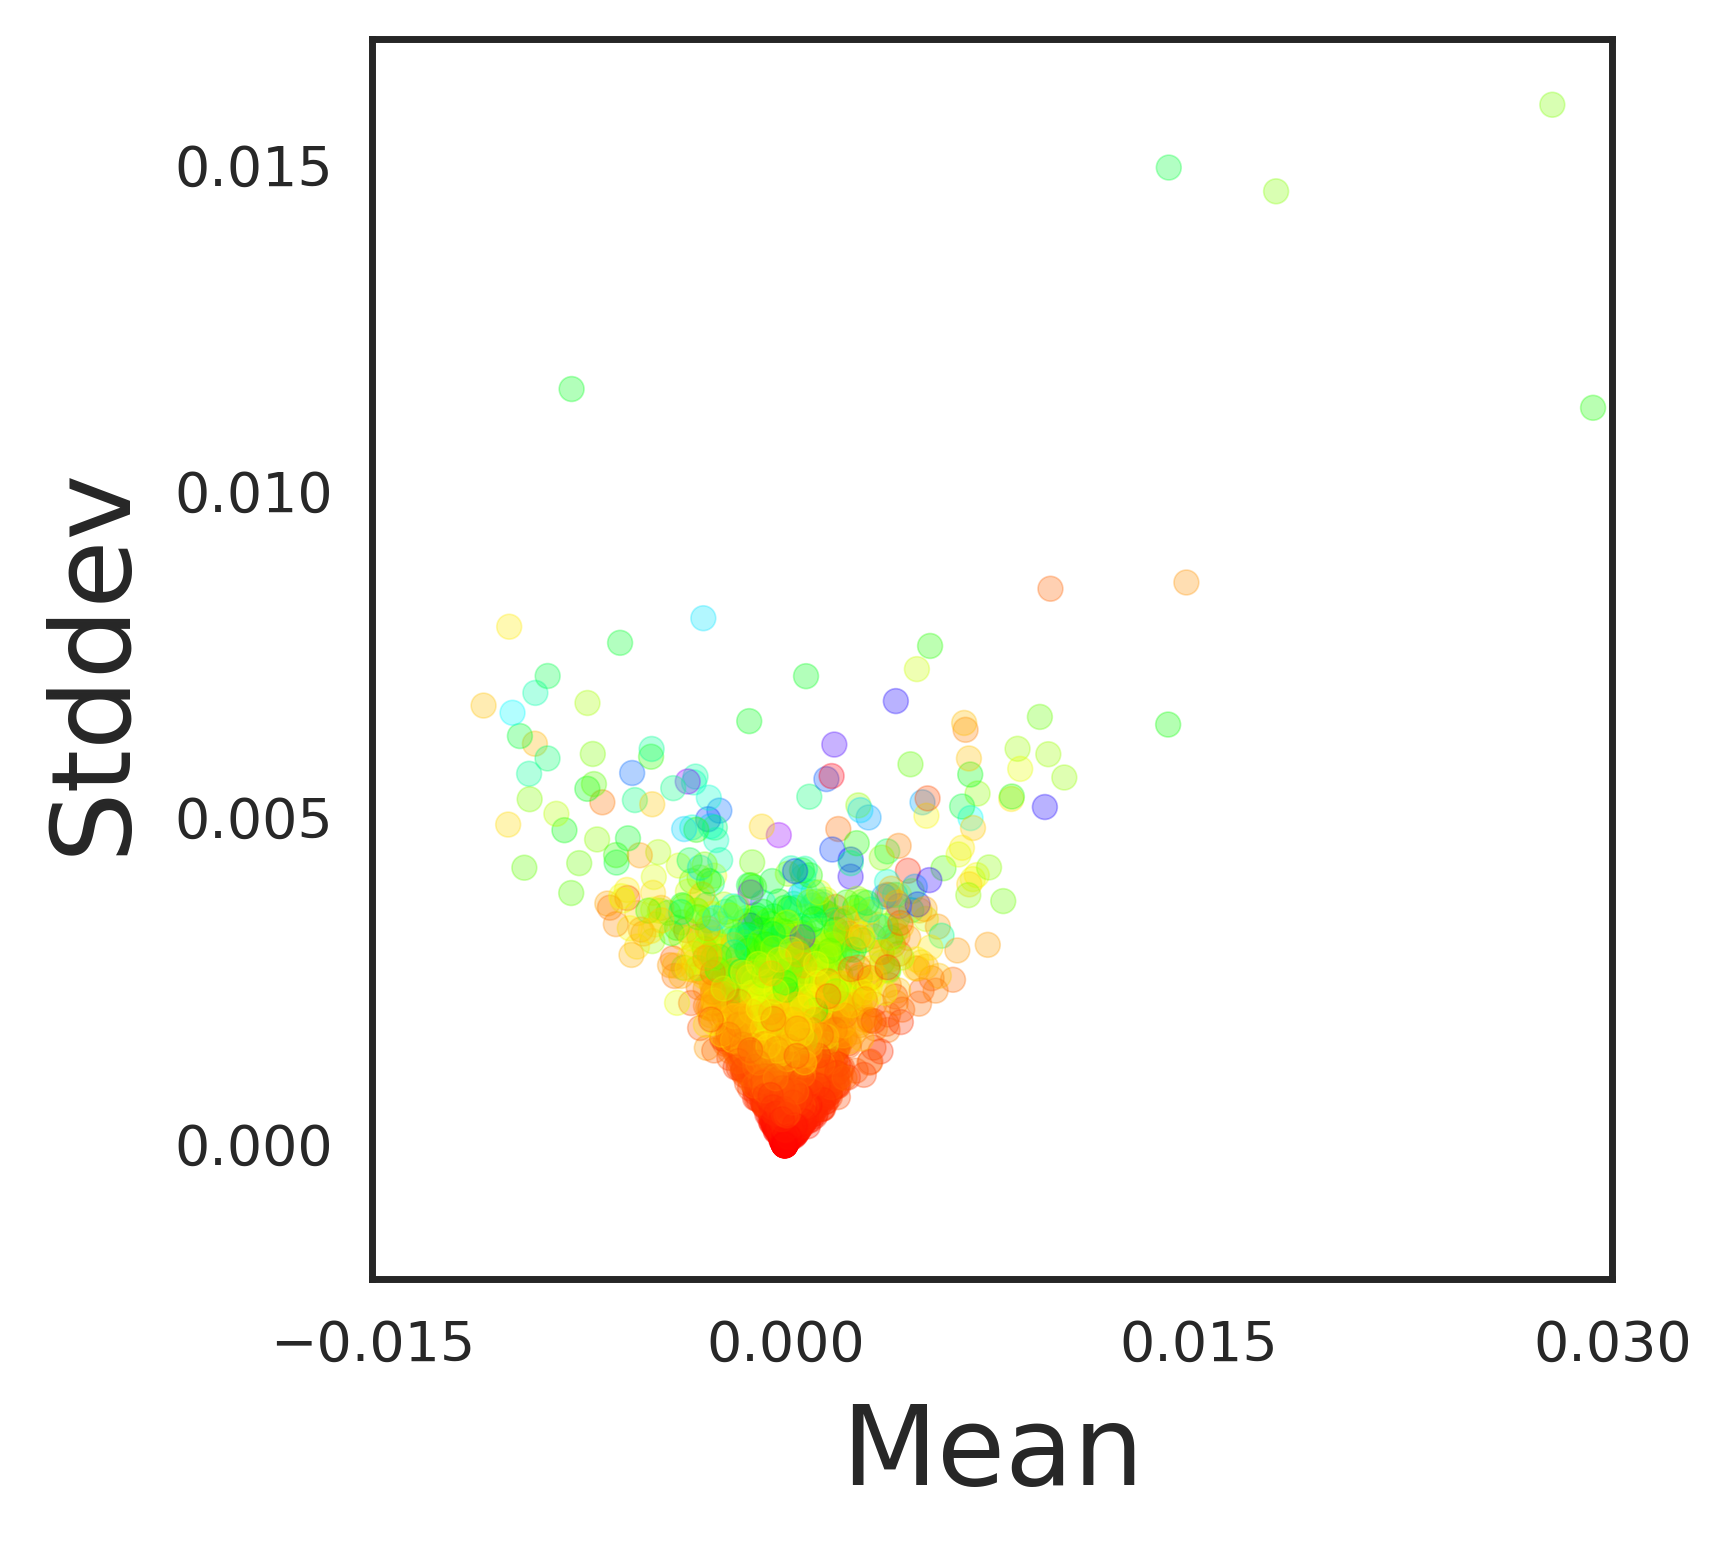

u"\nplt.figure(dpi=400)\nindices = np.greater(infl_stddevs,[0.0001]*len(infl_stddevs))\ninfl_means = np.array(infl_means)\ninfl_stddevs = np.array(infl_stddevs)\nplt.suptitle('Angle wrt y-axis')\nplt.xlabel('Radians')\nplt.ylabel('Count')\nplt.hist(np.arctan(np.divide(infl_means[np.where(indices)[0]],infl_stddevs[np.where(indices)[0]])),bins=30,range=(-2,2))\nplt.show()"

In [5]:
plt.figure(dpi=400,figsize=(4,4))
plt.scatter(infl_means, infl_stddevs,alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Mean',fontsize=20)
plt.xlim(-0.015,0.03)
plt.xticks([-0.015,0,0.015,0.03])
plt.ylabel('Stddev',fontsize=20)
plt.ylim(-0.002,0.017)
plt.show()
plt.savefig('MNIST_indiv_pred_infl.png',dpi=400)
"""
plt.figure(dpi=400)
indices = np.greater(infl_stddevs,[0.0001]*len(infl_stddevs))
infl_means = np.array(infl_means)
infl_stddevs = np.array(infl_stddevs)
plt.suptitle('Angle wrt y-axis')
plt.xlabel('Radians')
plt.ylabel('Count')
plt.hist(np.arctan(np.divide(infl_means[np.where(indices)[0]],infl_stddevs[np.where(indices)[0]])),bins=30,range=(-2,2))
plt.show()"""

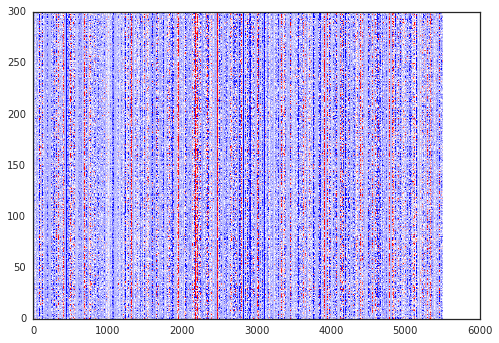

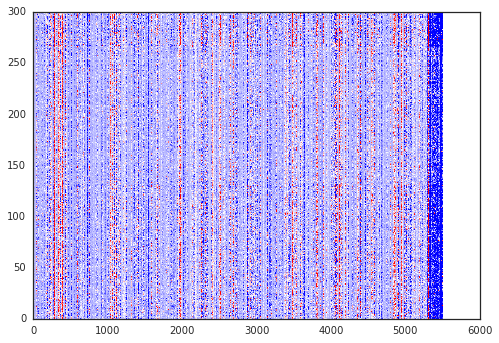

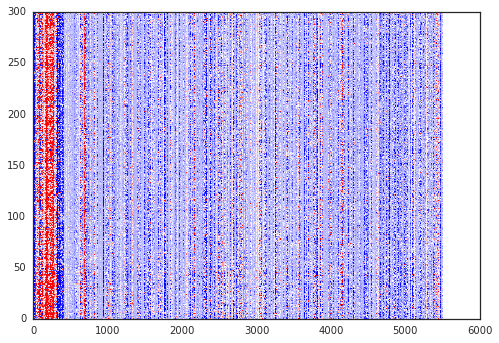

In [4]:
import sys
sys.setrecursionlimit(10000)

#plt.matshow(indiv_pred_infls,cmap=plt.cm.Blues)

normalize2 = colors.Normalize(vmin=indiv_pred_infls.min()/20,vmax=indiv_pred_infls.max()/20)

plt.pcolormesh(indiv_pred_infls,cmap=plt.cm.bwr,norm=normalize2)
plt.show()

#n_clusters=(20,20)
model = SpectralBiclustering()#n_clusters=n_clusters, random_state=0)
model.fit(indiv_pred_infls)

fit_data = indiv_pred_infls[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.pcolormesh(fit_data,cmap=plt.cm.bwr,norm=normalize2)
plt.show()

#n_clusters=3
model = SpectralCoclustering()#n_clusters=n_clusters, random_state=0)
model.fit(indiv_pred_infls)

fit_data = indiv_pred_infls[np.argsort(model.row_labels_)]
fit_data = fit_data[:, np.argsort(model.column_labels_)]

plt.pcolormesh(fit_data,cmap=plt.cm.bwr,norm=normalize2)
plt.show()

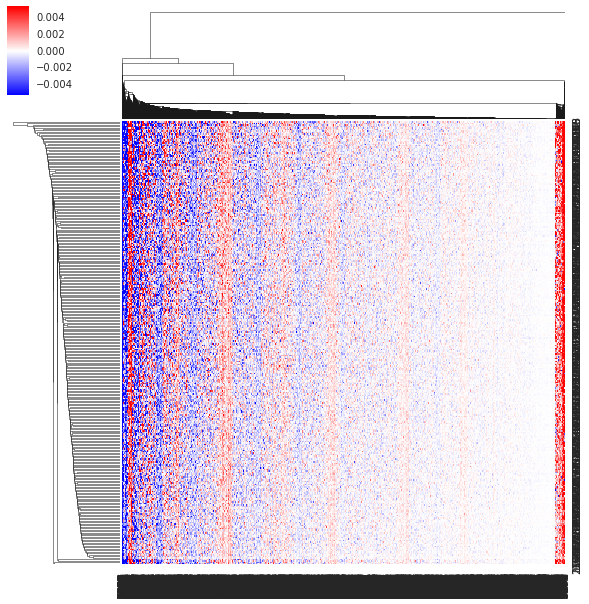

In [5]:
g = sns.clustermap(indiv_pred_infls,cmap='bwr',norm=normalize2,vmin=indiv_pred_infls.min()/20,vmax=indiv_pred_infls.max()/20)

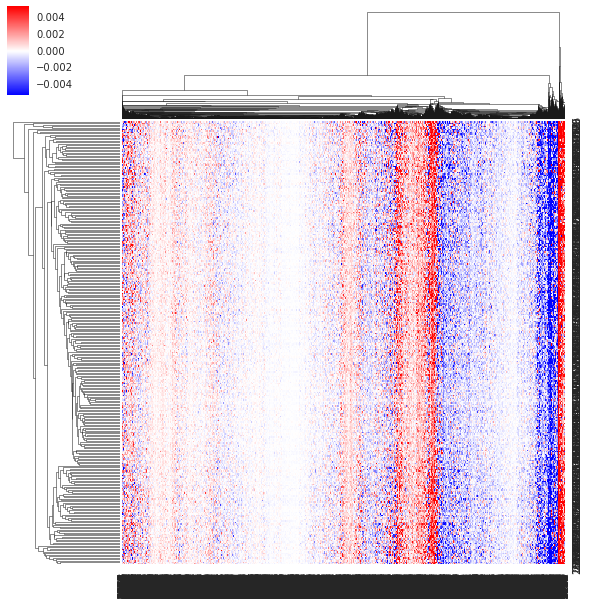

In [6]:
normalize2 = colors.Normalize(vmin=indiv_pred_infls.min()/20,vmax=indiv_pred_infls.max()/20)

g = sns.clustermap(indiv_pred_infls,method='complete',cmap='bwr',norm=normalize2,vmin=indiv_pred_infls.min()/20,vmax=indiv_pred_infls.max()/20)

In [8]:
def try_low_rank_approx(arr):

    u, s, vh = np.linalg.svd(arr)
    print(u.shape, s.shape, vh.shape)

    approx_pearsons = [None] * s.shape[0]

    def get_k_approx(k):
        u_k = u[:,:k]
        s_k = np.diag(s[:k])
        vh_k = vh[:k,:]
        mat_k = np.dot(u_k,(np.dot(s_k,vh_k)))
        approx_pearsons[k-1] = [pearsonr(mat_k[idx],arr[idx])[0] for idx in range(num_seeds)]
        return np.linalg.norm(mat_k - arr), mat_k
    norm_diffs = [get_k_approx(k+1)[0] for k in range(len(s))]
    approx_pearsons = np.array(approx_pearsons)

    plt.scatter(range(len(s)),norm_diffs)
    plt.plot(range(len(s)),[np.linalg.norm(arr)] * len(s))
    plt.xlabel('k')
    plt.ylabel('Norm of actual-approx')
    plt.show()

    plt.scatter(range(len(s)),s)
    plt.xlabel('k')
    plt.ylabel('SV')
    plt.show()

    def plot_approx_acc_on_seed(approx, idx, r):
        plt.scatter(approx[idx],arr[idx],alpha=0.3)
        plt.xlabel('Approx')
        plt.ylabel('Actual')
        plt.suptitle('Seed {}, Pearson\'s R {}'.format(seeds[idx], r))
        plt.show()

    plt.scatter(np.transpose([range(len(s))]*num_seeds),approx_pearsons,alpha=0.03)
    plt.errorbar(range(num_seeds),np.mean(approx_pearsons,axis=1),np.std(approx_pearsons,axis=1),alpha=0.3,color='r')
    plt.xlabel('k')
    plt.ylabel('Pearson\'s R')
    plt.show()

    k0=50
    _, infl_approx = get_k_approx(k0)

    """for idx in range(num_seeds):
        if approx_pearsons[k0-1][idx] < 0.71:
            plot_approx_acc_on_seed(infl_approx,idx,approx_pearsons[k0-1,idx])"""
    
    return u, s, vh, approx_pearsons, norm_diffs

(300, 300) (300,) (5500, 5500)


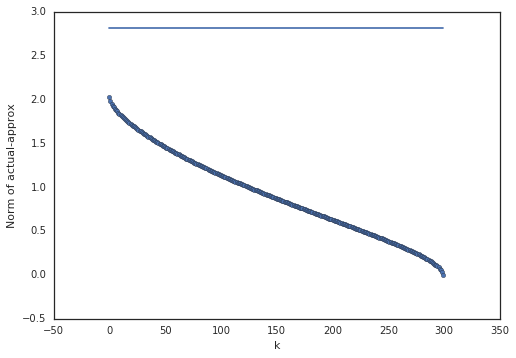

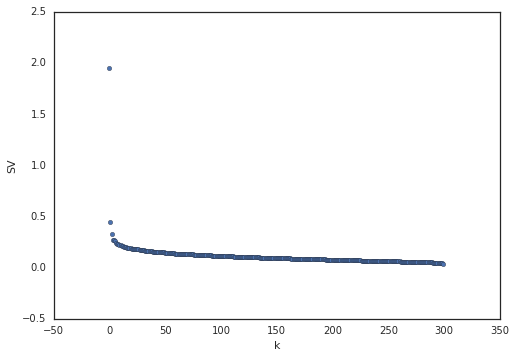

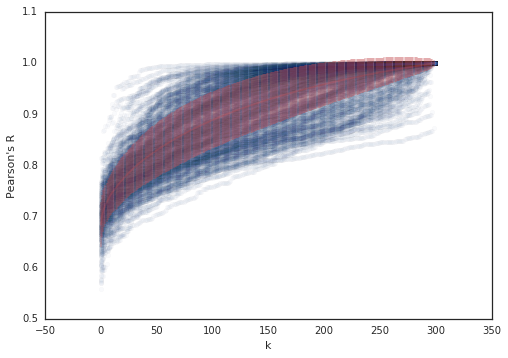

In [9]:
u, s, vh, approx_pearsons, norm_diffs = try_low_rank_approx(indiv_pred_infls)

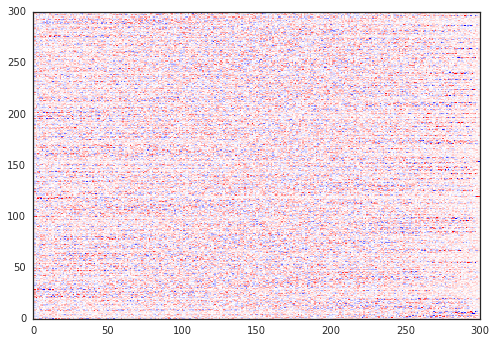

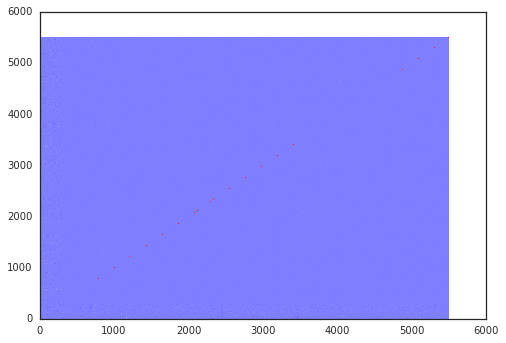

In [8]:
plt.pcolormesh(u,cmap=plt.cm.bwr,norm=colors.Normalize(u.min()/3,u.max()/3))
plt.show()
plt.pcolormesh(vh,cmap=plt.cm.bwr,norm=colors.Normalize(vh.min(),vh.max()))
plt.show()

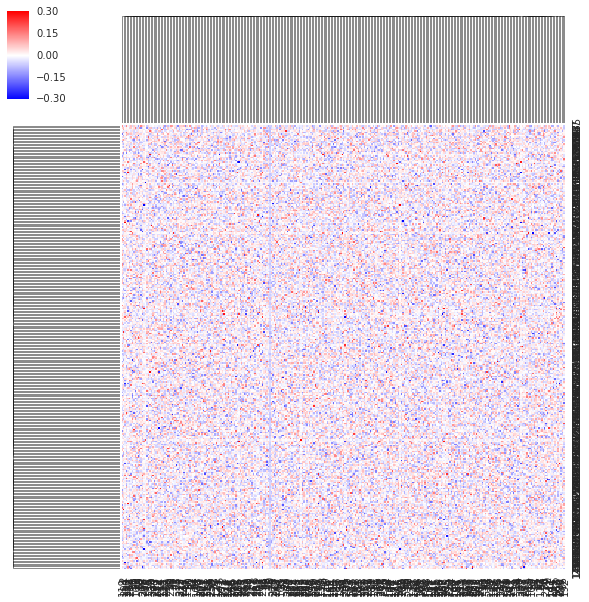

In [10]:
g_u = sns.clustermap(u,method='complete',cmap='bwr',vmin=u.min()/3,vmax=u.max()/3)
#g_vh = sns.clustermap(vh[:500,:500],cmap='bwr',vmin=vh.min()/3,vmax=vh.max()/3)

(300, 300) (300,) (5500, 5500)


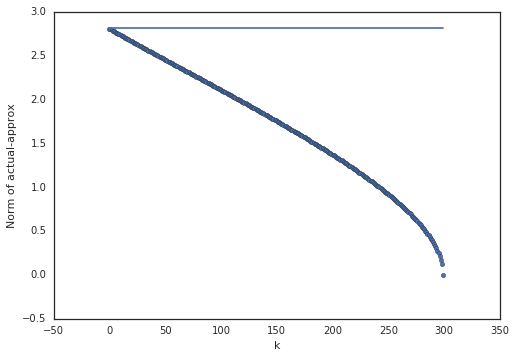

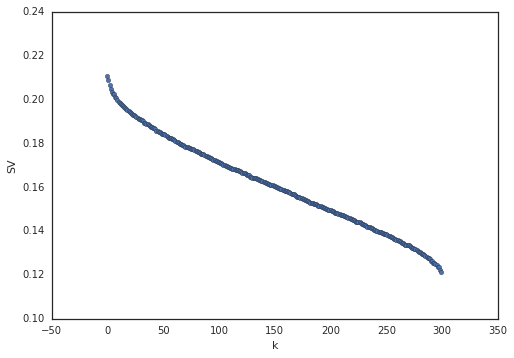

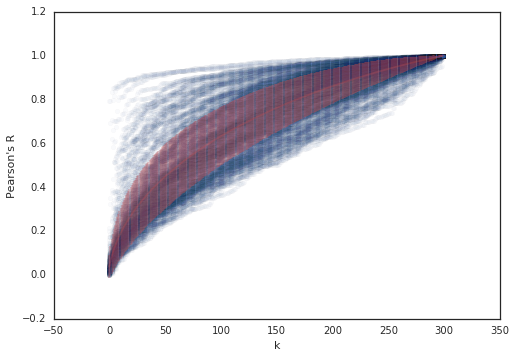

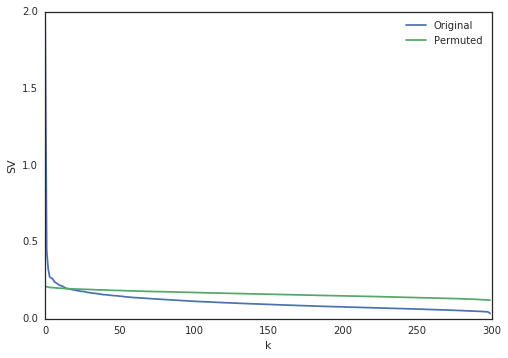

In [ ]:
# indiv_pred_infls[seed, train_idx]

# permutation of all
seed = 2
np.random.seed(seed)
indiv_pred_infls_perm = np.random.permutation(np.ndarray.flatten(indiv_pred_infls)).reshape(indiv_pred_infls.shape)

u_perm, s_perm, vh_perm, approx_pearsons_perm, norm_diffs_perm = try_low_rank_approx(indiv_pred_infls_perm)

plt.plot(s,label='Original')
plt.plot(s_perm,label='Permuted')
plt.xlabel('k')
plt.ylabel('SV')
plt.legend()
plt.show()

In [ ]:
# permutation within rows
seed = 2
np.random.seed(seed)
indiv_pred_infls_perm_in_rows = [np.random.permutation(indiv_pred_infls[i]) for i in range(len(indiv_pred_infls))]

u_rows, s_rows, vh_rows, approx_pearsons_rows, norm_diffs_rows = try_low_rank_approx(indiv_pred_infls_perm_in_rows)

# permutation within columns
seed = 2
np.random.seed(seed)
indiv_pred_infls_perm_in_cols = np.transpose([np.random.permutation(indiv_pred_infls[:,i]) for i in range(len(indiv_pred_infls[0]))])

u_cols, s_cols, vh_cols, approx_pearsons_cols, norm_diffs_cols = try_low_rank_approx(indiv_pred_infls_perm_in_cols)

In [ ]:
train_mean_per_seed = np.mean(indiv_train_losses,axis=1)
print(len(train_mean_per_seed))
plt.hist(train_mean_per_seed,bins=30)
plt.show()

test_mean_per_seed = np.mean(indiv_test_losses,axis=1)
print(len(test_mean_per_seed))
plt.hist(test_mean_per_seed,bins=30)
plt.show()

In [ ]:
plt.scatter(infl_stddevs, train_means, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Infl stddev')
plt.ylabel('Train mean')
plt.show()

plt.scatter(infl_means, train_means, alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Infl mean')
plt.ylabel('Train mean')
plt.show()

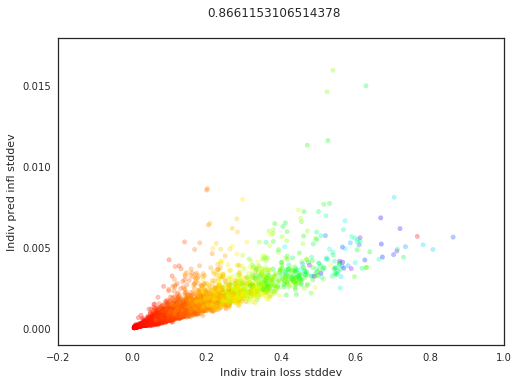

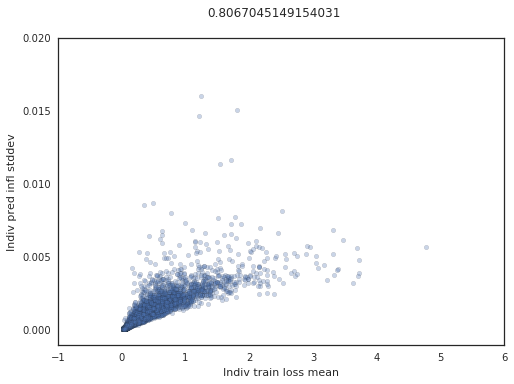

0.9343303
0.9225262


In [10]:
plt.suptitle(pearsonr(train_stddevs, infl_stddevs)[0])
plt.scatter(train_stddevs, infl_stddevs,alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Indiv train loss stddev')
plt.ylabel('Indiv pred infl stddev')
plt.ylim(-0.001,0.018)#06)
plt.show()

plt.suptitle(pearsonr(train_means, infl_stddevs)[0])
plt.scatter(train_means, infl_stddevs,alpha=0.3)
plt.xlabel('Indiv train loss mean')
plt.ylabel('Indiv pred infl stddev')
plt.ylim(-0.001,0.02)
plt.show()

print(pearsonr(train_means,train_stddevs)[0])
print(pearsonr(test_means,test_stddevs)[0])

In [ ]:
plt.scatter(np.log(train_means), np.log(train_stddevs),alpha=0.3)
plt.xlabel('Log of Mean')
plt.ylabel('Log of Stddev')
plt.plot(range(-5,3), np.poly1d(np.polyfit(np.log(train_means), np.log(train_stddevs), 1))(range(-5,3)),color='r')
plt.suptitle('Indiv train loss {}'.format(np.poly1d(np.polyfit(np.log(train_means), np.log(train_stddevs), 1))))
plt.show()

plt.scatter(np.log(test_means), np.log(test_stddevs),alpha=0.3)
plt.xlabel('Log of Mean')
plt.ylabel('Log of Stddev')
plt.plot(range(-5,3), np.poly1d(np.polyfit(np.log(test_means), np.log(test_stddevs), 1))(range(-5,3)),color='r')
plt.suptitle('Indiv test loss {}'.format(np.poly1d(np.polyfit(np.log(test_means), np.log(test_stddevs), 1))))
plt.show()

plt.suptitle('Indiv pred infl')
plt.scatter(infl_means, np.log(infl_stddevs),alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Mean')
plt.ylabel('Log of Stddev')
plt.show()

In [ ]:
plt.plot(losses_over_time[0])
plt.suptitle('Seed 0')
plt.xlabel('Thousands of steps')
plt.ylabel('Test Loss')
plt.show()

plt.scatter(indiv_train_losses[:,0],np.zeros(num_seeds),alpha=0.3)
plt.show()

plt.scatter(indiv_test_losses[:,0],np.zeros(num_seeds),alpha=0.3)
plt.show()

plt.scatter(indiv_pred_infls[:,0],np.zeros(num_seeds),alpha=0.3)
plt.show()

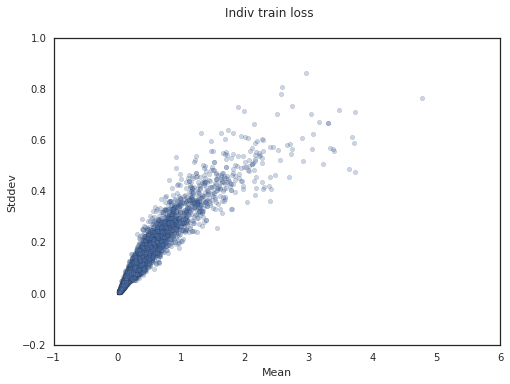

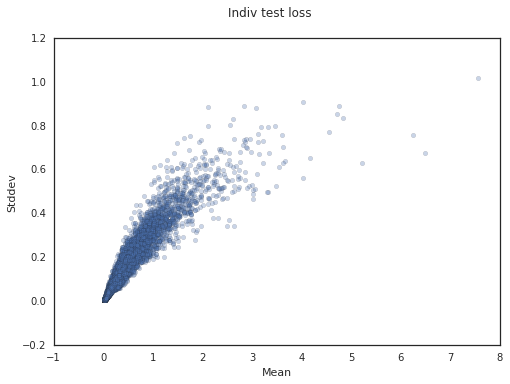

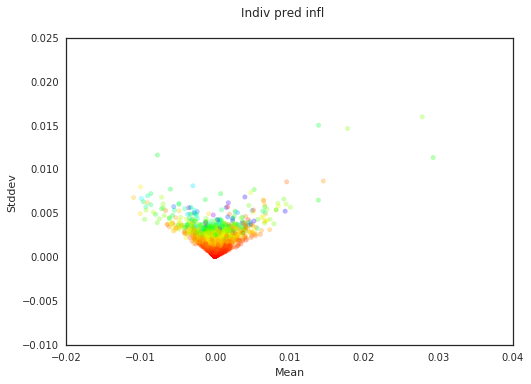

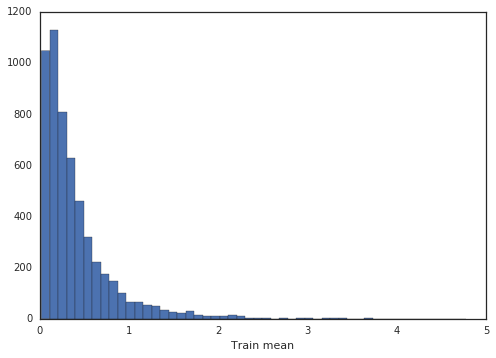

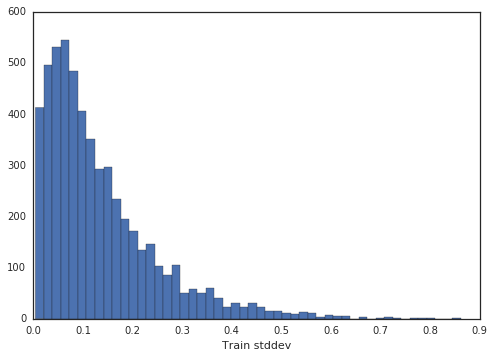

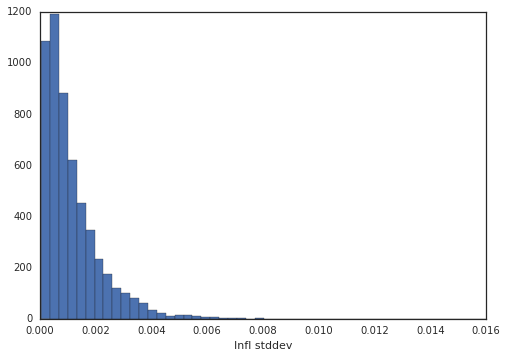

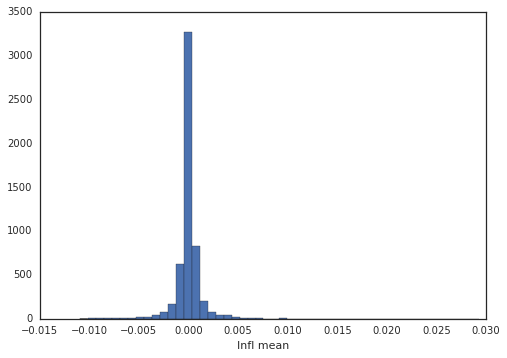

In [11]:
plt.suptitle('Indiv train loss')
plt.scatter(train_means, train_stddevs,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.suptitle('Indiv test loss')
plt.scatter(test_means, test_stddevs,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.suptitle('Indiv pred infl')
plt.scatter(infl_means, infl_stddevs,alpha=0.3, color=plt.cm.hsv(normalize(train_means)))
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.show()

plt.hist(train_means,bins=50)
plt.xlabel('Train mean')
plt.show()

plt.hist(train_stddevs,bins=50)
plt.xlabel('Train stddev')
plt.show()

plt.hist(infl_stddevs,bins=50)
plt.xlabel('Infl stddev')
plt.show()

plt.hist(infl_means,bins=50)
plt.xlabel('Infl mean')
plt.show()

In [ ]:
plt.suptitle('Indiv pred infl')
plt.scatter(infl_means, infl_stddevs,alpha=0.3)
plt.xlabel('Mean')
plt.ylabel('Stddev')
plt.axes().set_aspect('equal')
plt.xlim(-0.005,0.008)
plt.ylim(-0.0002,0.004)
plt.show()

indices = np.greater(infl_stddevs,[0.0001]*len(infl_stddevs))
infl_means = np.array(infl_means)
infl_stddevs = np.array(infl_stddevs)
plt.suptitle('Angle wrt y-axis')
plt.xlabel('Radians')
plt.ylabel('Count')
plt.hist(np.arctan(np.divide(infl_means[np.where(indices)[0]],infl_stddevs[np.where(indices)[0]])),bins=30,range=(-2,2))
plt.show()